### Coding Phillips' HIV model

A pattern of changes in virus concentration similar to that observed in patients is predicted by the model.
The reduction of the virus concentration during acute infection may not reflect the ability of the HIV-specific immune response to control virus  replication.

The model is defined by 4 equations describing interraled changes over time in the number of activated, uninfected CD4 lymphocytes (R), latently infected cells (L), actively infected cells (E), and free virions (V)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

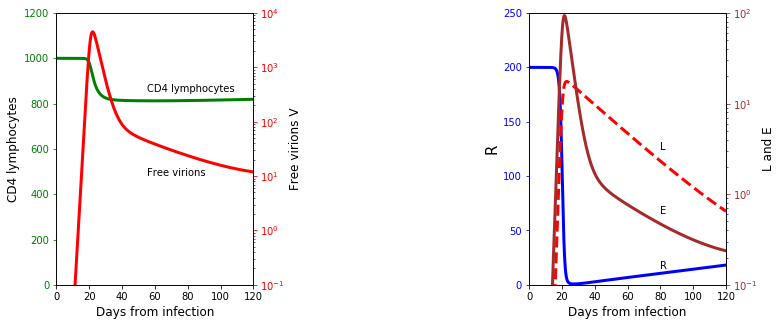

In [4]:
#Initial number
R0 = 200
L0 = 0
E0 = 0
V0 = 4.0e-7

#Parameters
Gamma = 1.36    #Production rate of CD4 cells
Mu = 1.36e-3    #Death rate of CD4 cells
Tau = 0.2       #Fraction of Cells susceptible of HIV attack
Beta = 0.00027  #Infection rate of cells per virion
P = 0.1         #Propotion of cells becoming latently infected
Alpha = 3.6e-2  #Activation rate of latently infected cells
Sigma = 2.0     #Removal rate of cell-free virus
Delta = 0.33    #Death rate of actively infected cells
Pi = 100.0        #Production rate of virions by an actively infected cell

#Initial Condition
y0 = [200.0, 0, 0, 4.0e-7]

#Time array
t = np.linspace(0, 120, 12001)

#Defining the functions
def hiv(y,t):
    R, L, E, V = y
    dRdt = Gamma * Tau - Mu * R - Beta * R * V   
    dLdt = P * Beta * R * V - Mu * L - Alpha * L
    dEdt = (1-P) * Beta * R * V + Alpha * L - Delta * E
    dVdt = Pi * E - Sigma * V
    dydt = [dRdt, dLdt, dEdt, dVdt]
    return dydt
sol = odeint(hiv,y0,t)
#Plot graphs; dRdt, dLdt, dEdt, dVdt
fig= plt.figure(figsize=(12,5))

ax1 = plt.subplot(1,3,1)    #Create a first y-axis
ax1.plot(t,1000*(1-Tau)+sol[:,0]+sol[:,1]+sol[:,2],'g', linewidth=3)  #Plotting the total number of CD4 cells
ax1.set_xlabel('Days from infection', fontsize=12) 
ax1.set_ylabel('CD4 lymphocytes', fontsize=12)
ax1.set_xlim(0,120)
ax1.set_ylim(0,1200)
ax1.tick_params(axis='y', colors='green')
ax1.text(55,850,'CD4 lymphocytes')

ax2 = ax1.twinx()          #Create a twin y-axis to the first y-axis
ax2.plot(t,sol[:,3],'r',linewidth=3)
ax2.set_ylabel('Free virions V', fontsize=12)
ax2.set_xlim(0,120)
ax2.set_ylim(0.1,10000)
ax2.tick_params(axis='y', colors='red')
ax2.text(55,10,'Free virions')

plt.yscale('log')

ax3 = plt.subplot(1,3,3)       #Create an another y-axis
ax3.plot(t,sol[:,0],'b',linewidth=3)
ax3.set_xlabel('Days from infection', fontsize=12)
ax3.set_ylabel('R', fontsize=15)
ax3.set_xlim(0,120)
ax3.set_ylim(0,250)
ax3.tick_params(axis='y', colors='blue')
ax3.text(80,15,'R')

ax4 = ax3.twinx()           #Create a twin y-axis to the other y-axis
ax4.plot(t,sol[:,1],'--r',linewidth=3)
ax4.plot(t,sol[:,2],'brown',linewidth=3)
ax4.set_ylabel('L and E', fontsize=12)
ax4.set_xlim(0,120)
ax4.set_ylim(0.1,100)
ax4.tick_params(axis='y', colors='brown')
ax4.text(80,0.6,'E')
ax4.text(80,3.1,'L')

plt.yscale('log')

plt.show()
